<h1 style="text-align:center;color:red">Import library</h1>

In [1]:
#importing library for web scraping

from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import re
import pandas as pd
import matplotlib.pyplot as plt

<h2 style="text-align:center;color:green">Reading Url</h2>

In [2]:
# reading the url

httpObject=urlopen("https://www.flipkart.com/search?q=best+laptops+under+Rs+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off")
webdata=httpObject.read()

# print(webdata)

<h2 style="text-align:center;color:green">Prettify webdata</h2>

In [3]:
soupdata=soup(webdata)  # like str(738437)
type(soup(webdata))
# print(soupdata)

bs4.BeautifulSoup

In [4]:
# dir(soupdata) 

#like i="hello world" 
#     dir(i)

<h2 style="text-align:center;color:green">Find a comman container</h2>

In [5]:
containers=soupdata.findAll('div',{"class":"_2kHMtA"})   # type(container) === It is as list 
print(len(containers),type(containers))

24 <class 'bs4.element.ResultSet'>


In [6]:
containers[0] # only give first container data 

<div class="_2kHMtA"><a class="_1fQZEK" href="/lenovo-ideapad-3-core-i5-11th-gen-8-gb-512-gb-ssd-windows-10-home-15itl6-thin-light-laptop/p/itm019d07e14a431?pid=COMG6AKVCAGQZBW8&amp;lid=LSTCOMG6AKVCAGQZBW8AV9128&amp;marketplace=FLIPKART&amp;q=best+laptops+under+Rs+50000&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=cefee199-d7e1-4661-985e-701dc24906d2.COMG6AKVCAGQZBW8.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=gff3099bv40000001659102301285&amp;qH=c5191ad76aa4db6a" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="Lenovo IdeaPad 3 Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10 Home) 15ITL6 Thin and Light Laptop" class="_396cs4 _3exPp9" src="https://rukminim1.flixcart.com/image/312/312/kruyw7k0/computer/f/i/u/na-thin-and-light-laptop-lenovo-original-imag5jy6fsm2yx4q.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-">

In [7]:
# containers[24]

<h2 style="text-align:center;color:green">Useful data scrrap from URL</h2>

In [8]:
f=open('laptop.csv','wb')
f.write("ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL\n".encode())
for container in containers:
    # productname
    product=container.find('div',{'class':'_4rR01T'})
    ProductName=product.text.split('-')[0].strip()     # like (str.split(','))

    # star rating 
    star=container.find('div',{'class':'_3LWZlK'})
    try:
        Stars=star.text
    except:
        Stars=0

    # rating & reviews
    Rating=container.find("span",{'class':'_2_R_DZ'})
    try:
        ratRev=re.findall('\d+,?\d*',Rating.text)    # \d  for integer ,+ for 1 and more occurence ,? 0 or more occurence,* 0 or more
        Ratings=ratRev[0].replace(",","")
        Reviews=ratRev[1].replace(",","")
    except:
        Ratings=0
        Reviews=0
      
    # current price
    CurrentPrice=container.find('div',{'class':'_30jeq3 _1_WHN1'}).text.replace(",","")
    
    # mrp
    mrp=container.find('div',{'class':'_3I9_wc _27UcVY'})
    try:
        MRP=mrp.text.replace(",","")
    except:
        MRP=0

    #decription info
    Info=container.findAll('li','rgWa7D')
    if (Info[0].text.endswith(')')|Info[0].text.endswith('Processor')):
        Processor=Info[0].text
        RAM=Info[1].text
        Storage=Info[3].text
    else:
        Processor=Info[1].text
        RAM=Info[2].text
        Storage=Info[4].text
   
    
    # image url
    Image=container.img
    ImageURL=Image.get('src')
    
    print(ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL)
    f.write(f"{ProductName},{Stars},{Ratings},{Reviews},{CurrentPrice},{MRP},{Processor},{RAM},{Storage},{ImageURL}\n".encode())
    print('\n')
f.close()


Lenovo IdeaPad 3 Core i5 11th Gen 4.2 159 15 ₹47241 ₹88990 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kruyw7k0/computer/f/i/u/na-thin-and-light-laptop-lenovo-original-imag5jy6fsm2yx4q.jpeg?q=70


Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U 4.3 522 65 ₹46049 ₹68490 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/keaaavk0/computer/x/m/y/lenovo-na-laptop-original-imafuzt8r5jqppfn.jpeg?q=70


MSI GF63 Thin Hexa Core i5 10th Gen 4.4 3052 320 ₹49990 ₹76990 Intel Hexa Core i5 Processor (10th Gen) 8 GB DDR4 RAM 1 TB HDD|256 GB SSD https://rukminim1.flixcart.com/image/312/312/ko7idu80/computer/x/l/i/gf63-thin-10scxr-1616in-notebook-msi-original-imag2q55h6w2avfr.jpeg?q=70


Lenovo IdeaPad Gaming 3 Core i5 10th Gen 4.3 578 54 ₹53490 ₹85290 Intel Core i5 Processor (10th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kp2y2kw0/computer/3/q/k/lenovo-original-ima

<h1 style="text-align:center;color:red">Show data using dataframe</h1>

In [11]:
datainfo=pd.read_csv("laptop.csv",error_bad_lines=False)
datainfo

b'Skipping line 17: expected 10 fields, saw 11\n'


,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,Lenovo IdeaPad 3 Core i5 11th Gen,4.2,159,15,₹47241,₹88990,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
1,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,4.3,522,65,₹46049,₹68490,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
2,MSI GF63 Thin Hexa Core i5 10th Gen,4.4,3052,320,₹49990,₹76990,Intel Hexa Core i5 Processor (10th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
3,Lenovo IdeaPad Gaming 3 Core i5 10th Gen,4.3,578,54,₹53490,₹85290,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
4,Lenovo IdeaPad Ryzen 5 Hexa Core 5500U,4.6,7,2,₹45990,₹67990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
5,Lenovo Thinkpad Ryzen 5 Hexa Core 5600U,4.4,36,5,₹56990,₹78400,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
6,Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen,4.3,424,41,₹48990,₹75390,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
7,Lenovo IdeaPad Gaming Core i7 10th Gen,4.6,53,2,₹76999,₹99290,Intel Core i7 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
8,MSI Modern 14 Core i3 11th Gen,4.3,153,20,₹48790,₹55990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
9,MSI Modern 14 Core i3 10th Gen,4.4,513,99,₹47490,₹52491,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


<h2 style="text-align:center;color:green">Bar chart in horizontal form</h2>

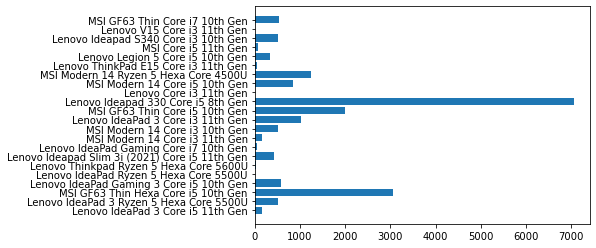

In [12]:
plt.barh(y=datainfo["ProductName"],width=datainfo["Ratings"])
# plt.xticks(rotation=90)
plt.show()

<h2 style="text-align:center;color:green">Bar chart in vertical form</h2>

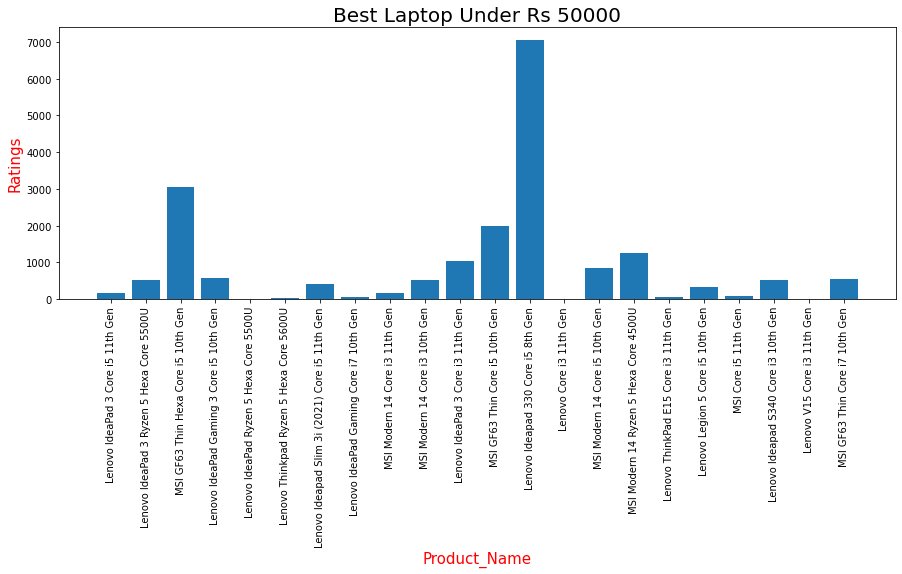

In [13]:
plt.figure(figsize=(15,5))
plt.bar(x=datainfo["ProductName"],height=datainfo["Ratings"])
plt.title("Best Laptop Under Rs 50000",fontsize=20)
plt.xlabel("Product_Name",fontsize=15,color="red")
plt.ylabel("Ratings",fontsize=15,color="red")
plt.xticks(rotation=90)
plt.savefig("rat&product.jpg")
plt.show()

In [14]:
datainfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   23 non-null     object 
 1   Stars         23 non-null     float64
 2   Ratings       23 non-null     int64  
 3   Reviews       23 non-null     int64  
 4   CurrentPrice  23 non-null     object 
 5   MRP           23 non-null     object 
 6   Processor     23 non-null     object 
 7   RAM           23 non-null     object 
 8   Storage       23 non-null     object 
 9   ImageURL      23 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.9+ KB
